Maximum Temperature - 304.16
Minimum Temperature - 292.58
                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-10 18:00:00        22.29        52        1.11           clear sky
2024-11-10 21:00:00        21.71        55        1.33           clear sky
2024-11-11 00:00:00        20.38        59        1.08           clear sky
2024-11-11 03:00:00        22.89        52        1.98           clear sky
2024-11-11 06:00:00        27.56        38        4.08           clear sky
2024-11-11 09:00:00        29.63        31        3.12           clear sky
2024-11-11 12:00:00        27.11        40        2.60           clear sky
2024-11-11 15:00:00        23.64        44        2.00           clear sky
2024-11-11 18:00:00        21.94        48        1.68    scattered clouds
2024-11-11 21:00:00        20.53        54        1.08    scattered clouds
2024-11-12 00:00:00        19.59        59

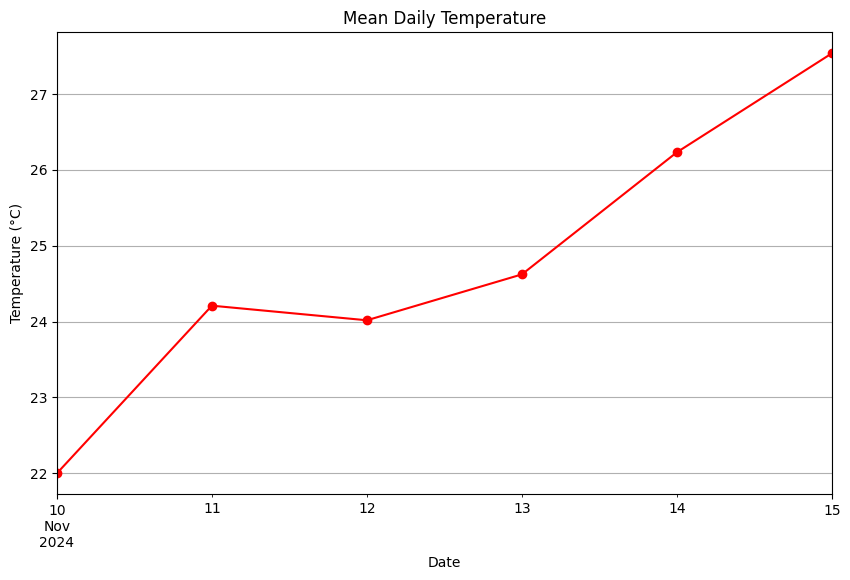

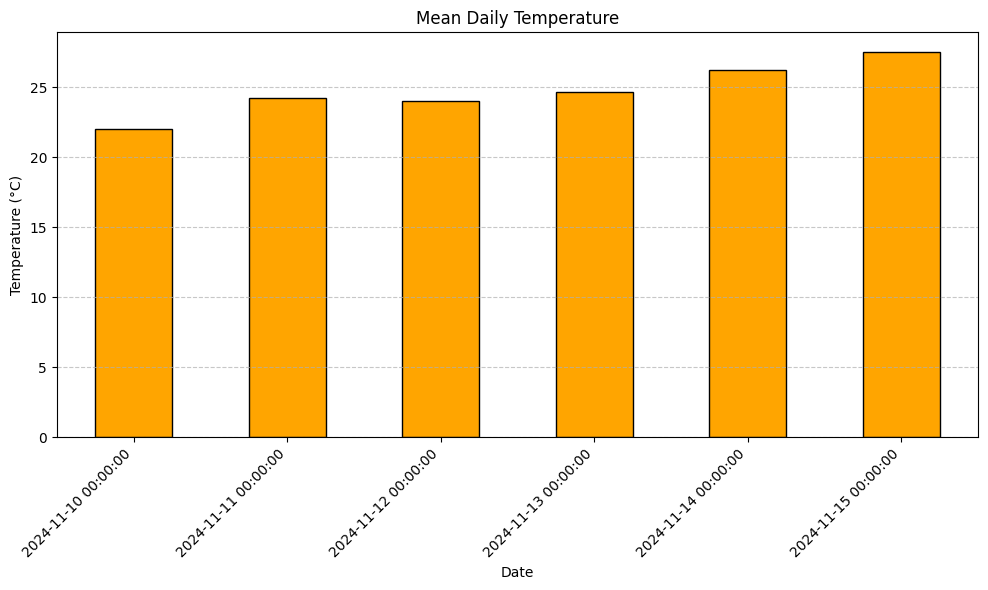

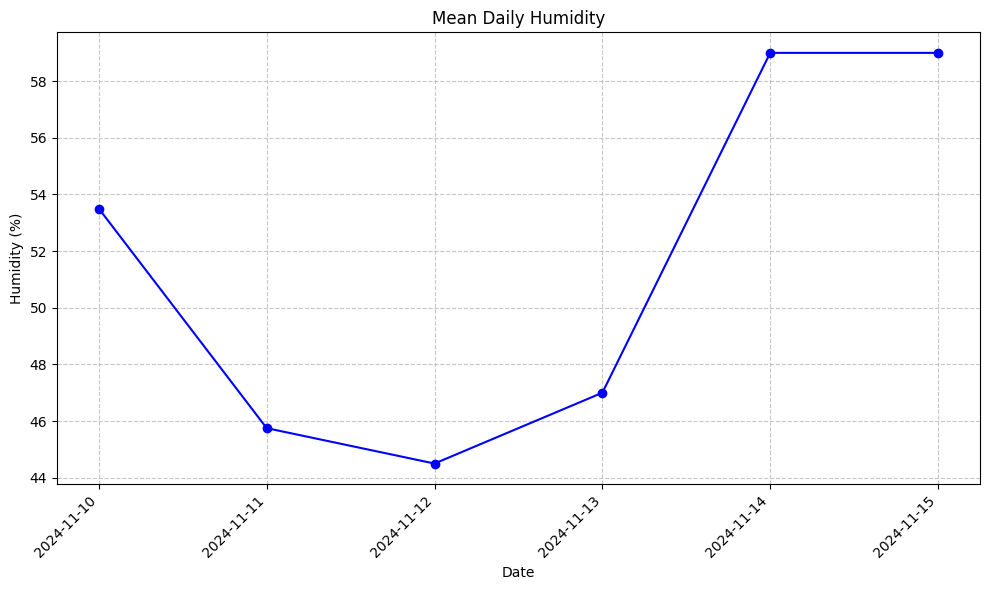

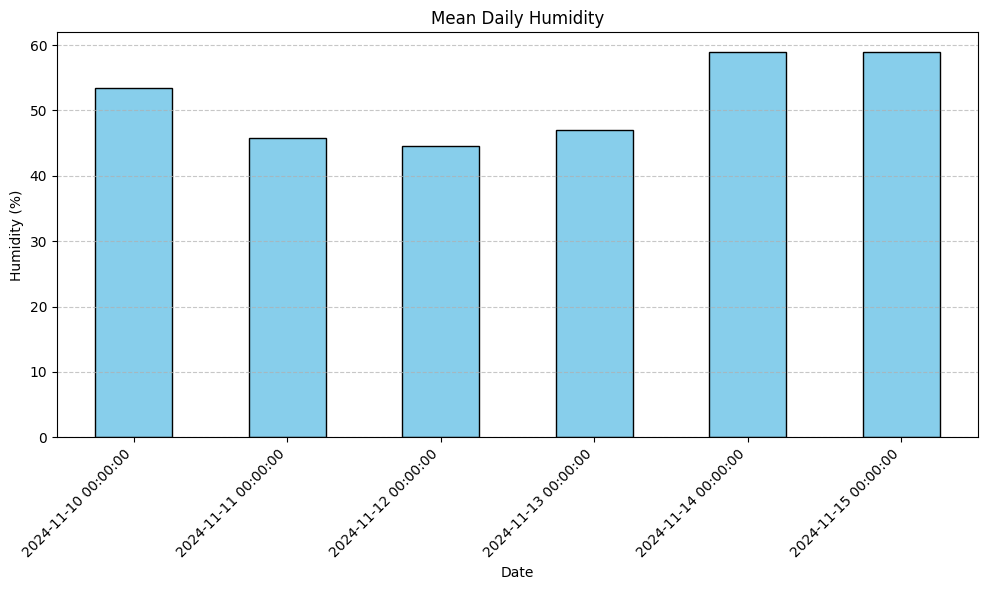

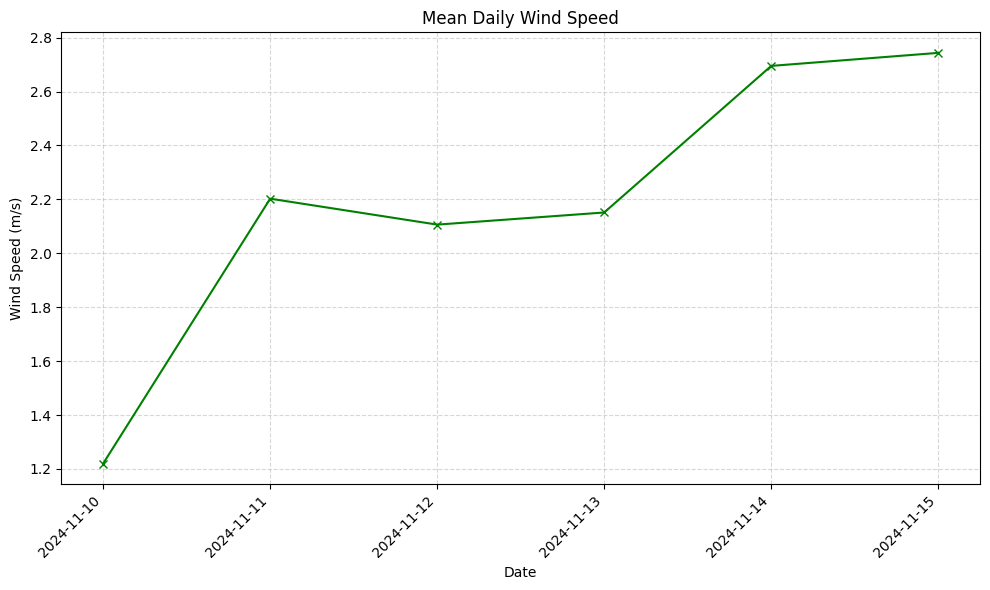

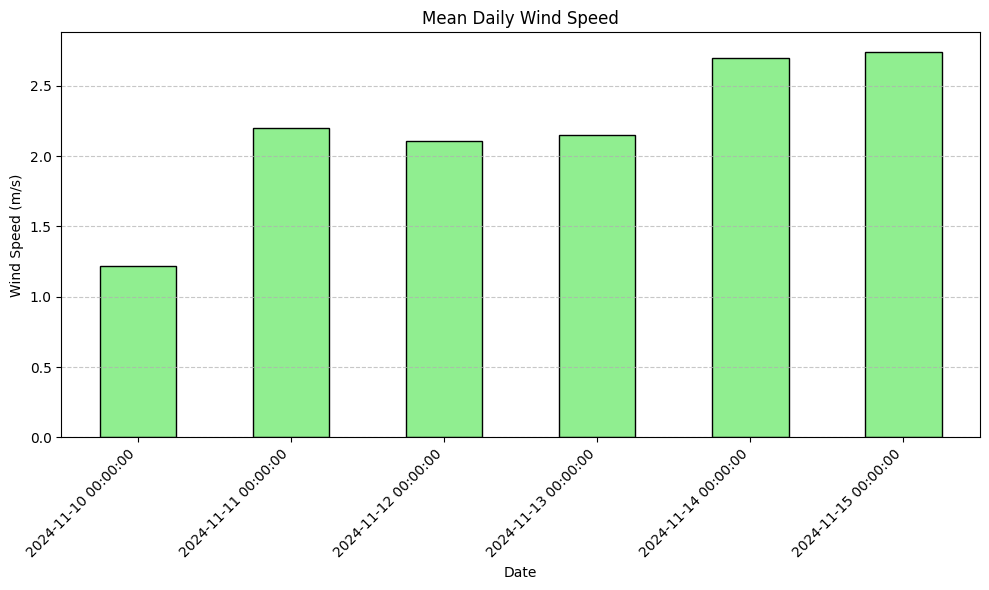

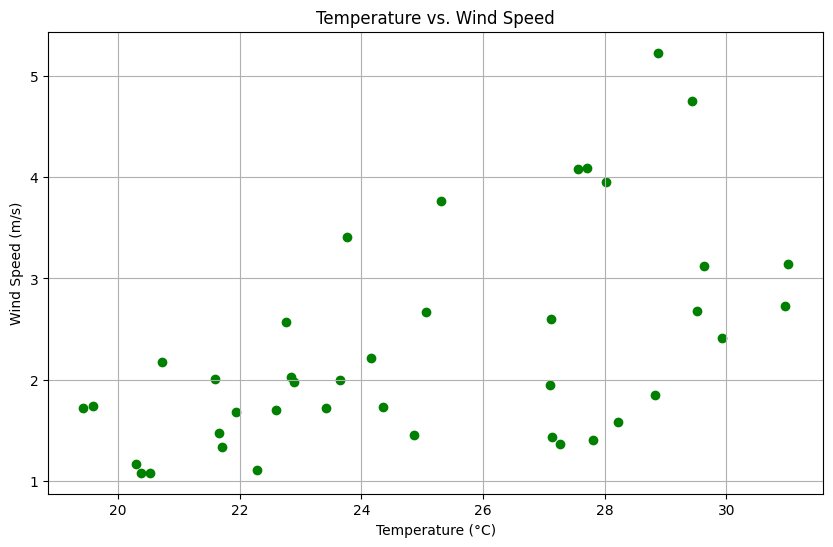

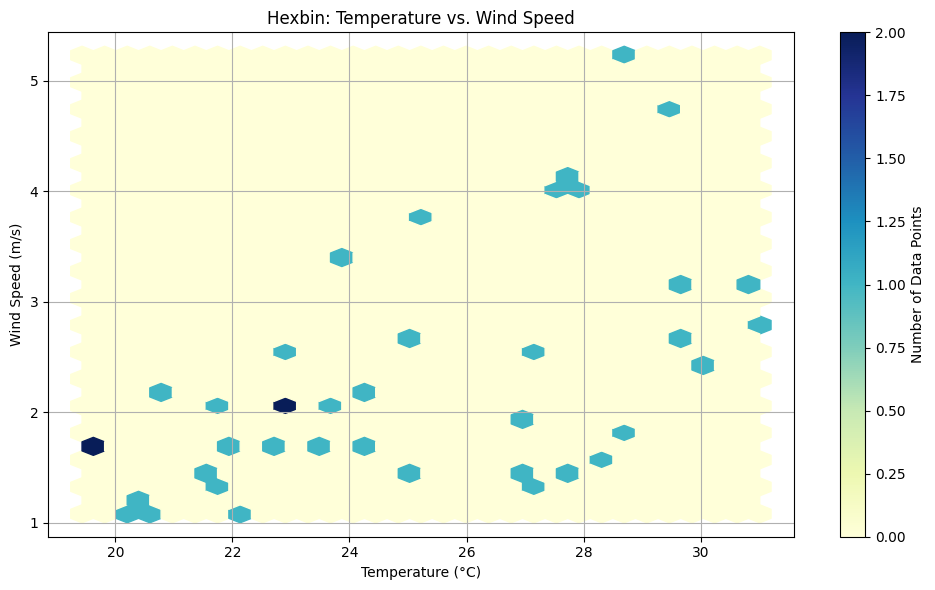

<Figure size 1000x600 with 0 Axes>

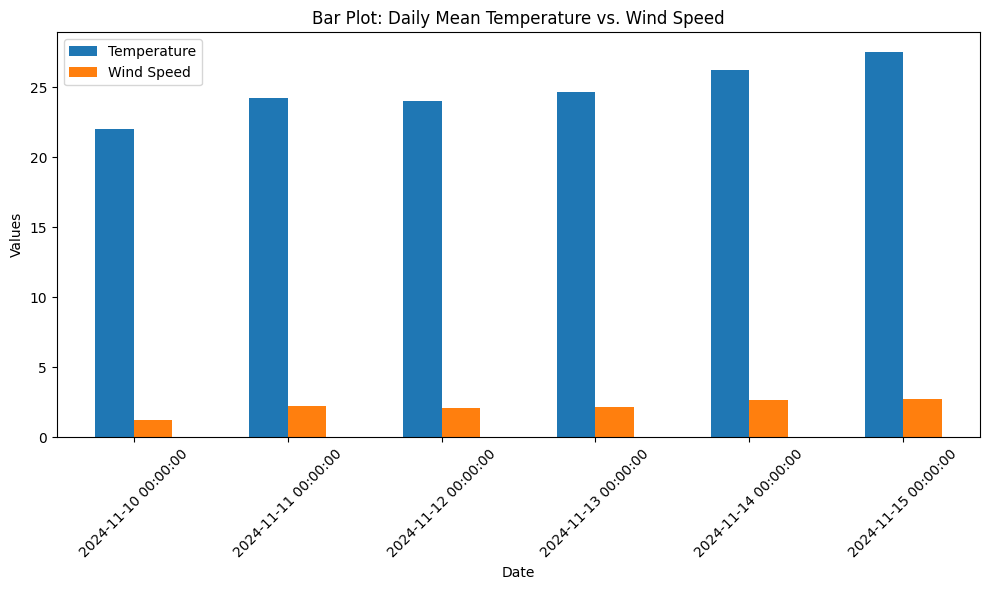

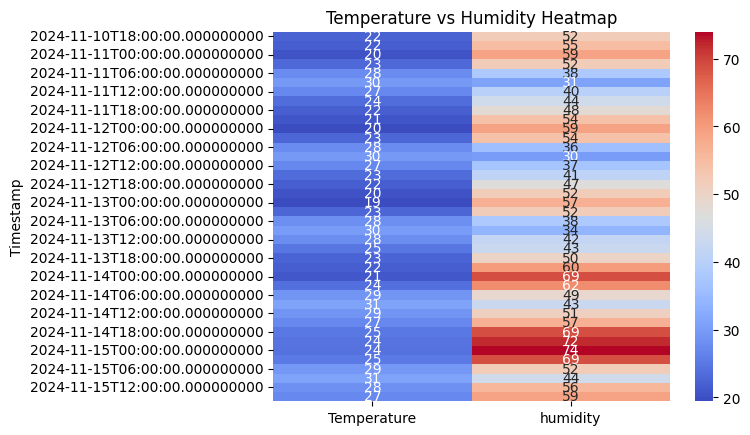

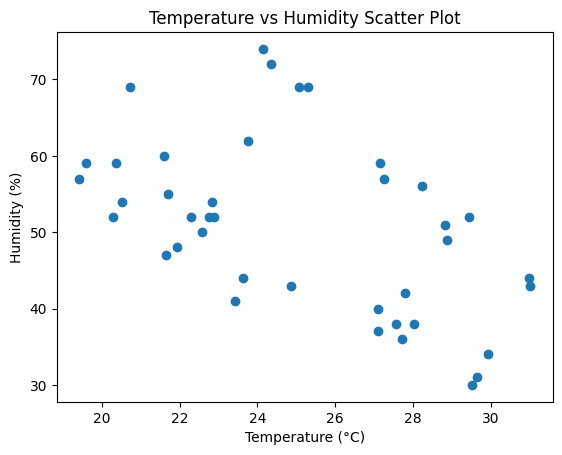

In [10]:
import requests, json

import requests 
import pandas as pd 
import datetime

api_key = "a86c3446bf26fe35193d41be64525f42"

lat = 18.5204
lon = 73.8567

api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

temperatures = [item['main']['temp'] for item in weather_data['list']] 

timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]      #retriving humidity data & putting it into list
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures,                #creating dataframe
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

weather_df.set_index('Timestamp', inplace=True)                   #set index
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

weather_df.fillna(0, inplace=True)           #replacing missing values

weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

print(weather_df)

import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')                    #line plot
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
daily_mean_temp.plot(kind='bar', color='orange', edgecolor='black')  # Bar plot
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_mean_humidity.index, daily_mean_humidity, color='blue', linestyle='-', marker='o', markersize=6)  # Line plot
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.7)  # Grid lines with dashed style
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='skyblue', edgecolor='black')  # Bar plot
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_mean_wind_speed.index, daily_mean_wind_speed, color='green', linestyle='-', marker='x', markersize=6)  # Line plot
plt.title('Mean Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, linestyle='--', alpha=0.5)  # Grid lines with dashed style
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

plt.figure(figsize=(10, 6))
daily_mean_wind_speed.plot(kind='bar', color='lightgreen', edgecolor='black')  # Bar plot
plt.title('Mean Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Grid lines for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hexbin(weather_df['Temperature'], weather_df['wind_speed'], gridsize=30, cmap='YlGnBu')  # Hexbin plot
plt.colorbar(label='Number of Data Points')  # Adds a color bar to indicate density
plt.title('Hexbin: Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Assuming daily_mean_temp and daily_mean_wind_speed are already calculated
plt.figure(figsize=(10, 6))
daily_mean_df = pd.DataFrame({
    'Temperature': daily_mean_temp,
    'Wind Speed': daily_mean_wind_speed
})
daily_mean_df.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Plot: Daily Mean Temperature vs. Wind Speed')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()
